In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif

In [12]:
wine = load_wine(return_X_y=True)
wine

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]], shape=(178, 13)),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [3]:
X, y = wine.data, wine.target

In [18]:
mi_scores = mutual_info_classif(X, y)

In [19]:
mi_scores

array([0.46885201, 0.2866306 , 0.07389052, 0.24018264, 0.1762626 ,
       0.42776953, 0.65983694, 0.10763677, 0.28549075, 0.55004084,
       0.47245035, 0.49818404, 0.55793015])

In [22]:
X.std(axis=0)

array([8.09542915e-01, 1.11400363e+00, 2.73572294e-01, 3.33016976e+00,
       1.42423077e+01, 6.24090564e-01, 9.96048950e-01, 1.24103260e-01,
       5.70748849e-01, 2.31176466e+00, 2.27928607e-01, 7.07993265e-01,
       3.14021657e+02])

In [24]:
corr

alcalinity_of_ash               0.517859
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
color_intensity                 0.265668
ash                             0.049643
magnesium                       0.209179
alcohol                         0.328222
proanthocyanins                 0.499130
hue                             0.617369
proline                         0.633717
total_phenols                   0.719163
od280/od315_of_diluted_wines    0.788230
flavanoids                      0.847498
Name: target, dtype: float64

In [4]:
wine.feature_names, wine.target_names

(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 array(['class_0', 'class_1', 'class_2'], dtype='<U7'))

In [5]:
df = pd.concat(
    [pd.DataFrame(X, columns=wine.feature_names), pd.Series(y, name='target')], axis=1
)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [23]:
corr = abs(df.corr()['target'].drop('target').sort_values(ascending=False))

In [16]:
df[corr[corr > 0.5].index]

,flavanoids,od280/od315_of_diluted_wines,total_phenols,proline,hue,alcalinity_of_ash
0,3.06,3.92,2.80,1065.0,1.04,15.6
1,2.76,3.40,2.65,1050.0,1.05,11.2
2,3.24,3.17,2.80,1185.0,1.03,18.6
3,3.49,3.45,3.85,1480.0,0.86,16.8
4,2.69,2.93,2.80,735.0,1.04,21.0
...,...,...,...,...,...,...
173,0.61,1.74,1.68,740.0,0.64,20.5
174,0.75,1.56,1.80,750.0,0.70,23.0
175,0.69,1.56,1.59,835.0,0.59,20.0
176,0.68,1.62,1.65,840.0,0.60,20.0


In [6]:
# Standarize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Aplly PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

Text(0.5, 1.0, 'Wine Dataset: First Two Principal Components')

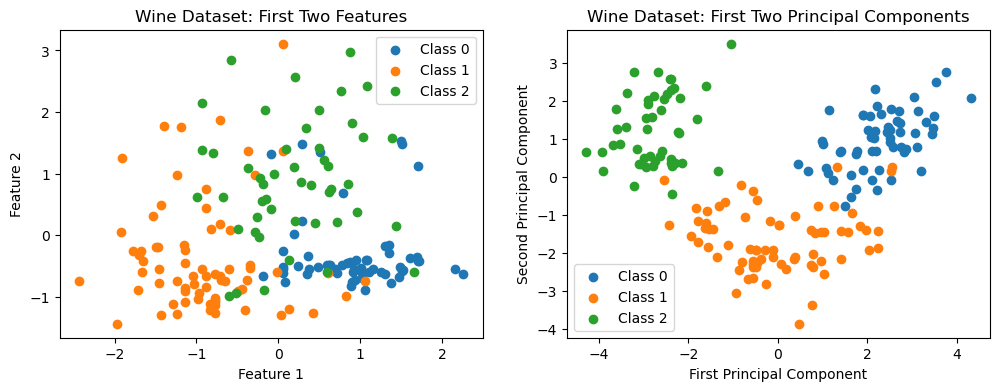

In [8]:
# Plot the first two principal components
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
for i in range(3):
    axs[0].scatter(X_scaled[y == i, 0], X_scaled[y == i, 1], label=f"Class {i}")
axs[0].set_xlabel("Feature 1")
axs[0].set_ylabel("Feature 2")
axs[0].legend()
axs[0].set_title("Wine Dataset: First Two Features")

# Plot the first two principal components
plt.subplot(1, 2, 2)
for i in range(3):
    axs[1].scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=f"Class {i}")
axs[1].set_xlabel("First Principal Component")
axs[1].set_ylabel("Second Principal Component")
axs[1].legend()
axs[1].set_title("Wine Dataset: First Two Principal Components")

Text(0.5, 1.0, 'Explained Variance Ratio vs. Number of Components')

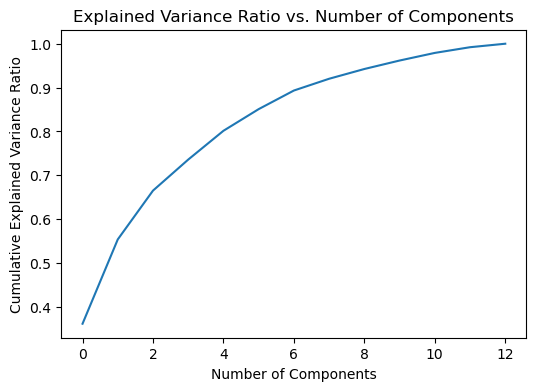

In [9]:
# Plot the cumulative explained variance ratio
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Explained Variance Ratio vs. Number of Components")

In [10]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


In [11]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components explaining 95% of variance: {n_components_95}")

Number of components explaining 95% of variance: 10


In [35]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=1.2)
X_selcted = selector.fit_transform(X)

selected_features = [X[i] for i in selector.get_support(indices=True)]
selected_features

[array([1.32e+01, 1.78e+00, 2.14e+00, 1.12e+01, 1.00e+02, 2.65e+00,
        2.76e+00, 2.60e-01, 1.28e+00, 4.38e+00, 1.05e+00, 3.40e+00,
        1.05e+03]),
 array([1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03]),
 array([1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]),
 array([1.386e+01, 1.350e+00, 2.270e+00, 1.600e+01, 9.800e+01, 2.980e+00,
        3.150e+00, 2.200e-01, 1.850e+00, 7.220e+00, 1.010e+00, 3.550e+00,
        1.045e+03]),
 array([1.375e+01, 1.730e+00, 2.410e+00, 1.600e+01, 8.900e+01, 2.600e+00,
        2.760e+00, 2.900e-01, 1.810e+00, 5.600e+00, 1.150e+00, 2.900e+00,
        1.320e+03])]